In [48]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time

pd.options.display.width = 1200
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100
pd.options.display.max_rows = 67

In [21]:
data = pd.read_pickle("Features")

<h3>Oversampling</h3>

In [23]:
from imblearn.over_sampling import SMOTE

In [52]:
X = data.drop(columns='Class')
y = data["Class"]

X_smote, y_smote = SMOTE(sampling_strategy='minority').fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
data_combined = X_smote
data_combined["Class"]=y_smote
data_combined

In [56]:
data_combined.to_pickle("data_combined")

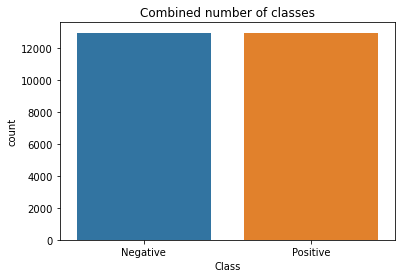

BLOSUM4    -0.017391
KF3        -0.044206
BLOSUM7     0.170388
VHSE4       0.469780
ProtFP7    -0.440846
BLOSUM1     0.230947
Z3          0.039359
VHSE8       1.294106
ST7         0.423336
T4         -0.069511
F4         -0.200102
T2         -0.156131
BLOSUM3     0.605743
BLOSUM10    0.114619
KF1         0.298286
dtype: float64

In [53]:
sns.countplot(x="Class",data=data_combined, order = data_combined["Class"].value_counts().index)
plt.title("Combined number of classes")
plt.show()

data_combined.skew()

In [54]:
state=42
classifiers ={
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(random_state=state),
    "MLP Classifier" : MLPClassifier(max_iter=1000, random_state=state),
    "Logistic Regression" : LogisticRegression(max_iter=1000, random_state=state),
    "K Neighbors Classifier" : KNeighborsClassifier(),
}

In [55]:
for x, y in enumerate(classifiers):
    model = classifiers[y]
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)

    print(".................................")
    print(y, model.score(X_test, y_test))
    print("Classification Report for",classifiers[y],":\n", classification_report(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Negatives:",tn)
    print("False Negatives",fn)
    print("True Positives",tp) 
    print("False Positive",fp)
    print("\nF1 Score:",f1_score(y_test, y_pred, pos_label="Positive"))
    print("\nAccuracy_score:",accuracy_score(y_test, y_pred))

.................................
Naive Bayes 0.638990560585629
Classification Report for GaussianNB() :
               precision    recall  f1-score   support

    Negative       0.61      0.75      0.68      2602
    Positive       0.68      0.53      0.59      2589

    accuracy                           0.64      5191
   macro avg       0.65      0.64      0.63      5191
weighted avg       0.65      0.64      0.63      5191

True Negatives: 1951
False Negatives 1223
True Positives 1366
False Positive 651

F1 Score: 0.5931393834129397

Accuracy_score: 0.638990560585629
.................................
Decision Tree 0.9007898285494125
Classification Report for DecisionTreeClassifier(random_state=42) :
               precision    recall  f1-score   support

    Negative       0.89      0.92      0.90      2602
    Positive       0.91      0.88      0.90      2589

    accuracy                           0.90      5191
   macro avg       0.90      0.90      0.90      5191
weighted avg 